## Import modules

In [1]:
import scvi
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

scvi.settings.seed = 420

Global seed set to 0
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.

In [2]:
import session_info
session_info.show()

## Read in data

In [3]:
# paired
adata_paired = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/Immune/MultiVI-pre_paired_foetal_MoMP_raw.h5ad')
adata_paired

AnnData object with n_obs × n_vars = 1899 × 544641
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id'

In [4]:
adata_paired.obs

,sangerID,combinedID,donor,facility,cell_or_nuclei,modality,kit_10x,scrublet_score,doublet_pval,doublet_bh_pval,...,fine_grain,mid_grain,coarse_grain,heart_or_greatvessels,cycling,S_score,G2M_score,phase,stress_score,hb1_score
barcode,,,,,,,,,,,,,,,,,,,,,
BHF_F_Hea11933668_BHF_F_Hea11596621_CATAGTCAGCAATAGG-1,BHF_F_Hea11933668,BHF_F_Hea11933668_BHF_F_Hea11596621,Hst33,Sanger,nuclei,Multiome,Multiome-v1,0.051643,0.530428,0.925448,...,Monocytes,MyeloidCells,Leukocytes,mix,no,-0.275917,-0.193263,G1,0.093001,-0.254929
BHF_F_Hea11933669_BHF_F_Hea11596622_TTCGGTACAGCACGTT-1,BHF_F_Hea11933669,BHF_F_Hea11933669_BHF_F_Hea11596622,Hst33,Sanger,nuclei,Multiome,Multiome-v1,0.032020,0.827202,0.881283,...,MacrophagesLYVE1pos,MyeloidCells,Leukocytes,mix,no,-0.217876,-0.143517,G1,0.565223,-0.247341
BHF_F_Hea11933667_BHF_F_Hea11596620_TCATGCCTCGTTATCT-1,BHF_F_Hea11933667,BHF_F_Hea11933667_BHF_F_Hea11596620,Hst33,Sanger,nuclei,Multiome,Multiome-v1,0.040106,0.888282,0.941734,...,MacrophagesLYVE1pos,MyeloidCells,Leukocytes,mix,no,-0.243927,-0.134643,G1,0.320393,-0.317302
BHF_F_Hea11933667_BHF_F_Hea11596620_TCTAATCTCCTCACTA-1,BHF_F_Hea11933667,BHF_F_Hea11933667_BHF_F_Hea11596620,Hst33,Sanger,nuclei,Multiome,Multiome-v1,0.099366,0.895206,0.941734,...,MacrophagesATF3pos,MyeloidCells,Leukocytes,mix,no,-0.149452,-0.184194,G1,-0.076030,-0.249038
7089STDY13216927_BHF_F_Hea13242534_GTTTCTAGTCCTAGTT-1,7089STDY13216927,7089STDY13216927_BHF_F_Hea13242534,Hst36,Sanger,nuclei,Multiome,Multiome-v1,0.024310,0.767897,0.841935,...,MacrophagesLYVE1pos,MyeloidCells,Leukocytes,mix,no,-0.092662,-0.107972,G1,0.046032,-0.140022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BHF_F_Hea11933668_BHF_F_Hea11596621_ATCACACAGCTATATG-1,BHF_F_Hea11933668,BHF_F_Hea11933668_BHF_F_Hea11596621,Hst33,Sanger,nuclei,Multiome,Multiome-v1,0.009334,0.917480,0.925448,...,MacrophagesLYVE1pos,MyeloidCells,Leukocytes,mix,no,-0.192901,-0.216730,G1,0.438321,-0.293559
7089STDY13216922_BHF_F_Hea13242529_TTGGCTTGTACTTCAC-1,7089STDY13216922,7089STDY13216922_BHF_F_Hea13242529,Hst36,Sanger,nuclei,Multiome,Multiome-v1,0.024599,0.777483,0.892857,...,MacrophagesLYVE1pos,MyeloidCells,Leukocytes,mix,no,-0.186634,-0.160566,G1,0.178089,-0.146193
BHF_F_Hea11064672_BHF_F_Hea11031825_AACTGTTCAACTAGCC-1,BHF_F_Hea11064672,BHF_F_Hea11064672_BHF_F_Hea11031825,C87,Sanger,nuclei,Multiome,Multiome-v1,0.034045,0.697631,0.799445,...,MacrophagesATF3pos,MyeloidCells,Leukocytes,mix,no,-0.030232,-0.168109,G1,0.372042,-0.305780


In [5]:
sum(adata_paired.var['modality']=='Gene Expression')

36601

In [6]:
# scrna
adata_scrna = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/Immune/MultiVI-pre_scRNA_foetal_MoMP_raw.h5ad')
adata_scrna

AnnData object with n_obs × n_vars = 5775 × 36601
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id'

## Concatenate anndata

In [7]:
adata_mvi = scvi.data.organize_multiome_anndatas(adata_paired, adata_scrna)
adata_mvi

/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 7674 × 544641
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id'

In [8]:
adata_mvi.obs[['modality']]

,modality
BHF_F_Hea11933668_BHF_F_Hea11596621_CATAGTCAGCAATAGG-1_paired,paired
BHF_F_Hea11933669_BHF_F_Hea11596622_TTCGGTACAGCACGTT-1_paired,paired
BHF_F_Hea11933667_BHF_F_Hea11596620_TCATGCCTCGTTATCT-1_paired,paired
BHF_F_Hea11933667_BHF_F_Hea11596620_TCTAATCTCCTCACTA-1_paired,paired
7089STDY13216927_BHF_F_Hea13242534_GTTTCTAGTCCTAGTT-1_paired,paired
...,...
BHF_F_Hea11192328_AAGACCTCACACGCTG-1_expression,expression
BHF_F_Hea11192328_CATATGGCAGCTCGCA-1_expression,expression
BHF_F_Hea11192328_CAACCAACACGCGAAA-1_expression,expression
BHF_F_Hea11192328_CATCAAGTCGTAGATC-1_expression,expression


In [9]:
# MultiVI requires the features to be ordered, 
# such that genes appear before genomic regions. In this case this is already the case, but it’s always good to verify:
adata_mvi = adata_mvi[:, adata_mvi.var["modality"].argsort()].copy()
adata_mvi.var

,modality,gene_name_scRNA-0,gene_id
MIR1302-2HG,Gene Expression,MIR1302-2HG,ENSG00000243485
AL391261.2,Gene Expression,AL391261.2,ENSG00000258847
FUT8-AS1,Gene Expression,FUT8-AS1,ENSG00000276116
FUT8,Gene Expression,FUT8,ENSG00000033170
AL355076.2,Gene Expression,AL355076.2,ENSG00000258760
...,...,...,...
chr5:177134858_177135358,Peaks,NaN,NaN
chr5:177134341_177134841,Peaks,NaN,NaN
chr5:177133469_177133969,Peaks,NaN,NaN
chr5:177194851_177195351,Peaks,NaN,NaN


In [10]:
# We also filter features to remove those that appear in fewer than 1% of the cells
# modified to 0.3% to retain around 100000 features
print(adata_mvi.shape)
sc.pp.filter_genes(adata_mvi, min_cells=int(adata_mvi.shape[0] * 0.003))
print(adata_mvi.shape)

(7674, 544641)
(7674, 142283)


In [11]:
adata_mvi.var['modality'].value_counts()

Peaks              126361
Gene Expression     15922
Name: modality, dtype: int64

## Setup and training MultiVI (with continuous covariates)

MultiVI requires the main batch annotation to correspond to the modality of the samples.<br> Other batch annotation, such as in the case of multiple RNA-only batches, can be specified using categorical_covariate_keys.



In [12]:
adata_mvi.obs['modality'].value_counts()

expression    5775
paired        1899
Name: modality, dtype: int64

In [13]:
adata_mvi.obs['batch_key'].value_counts()

C99_Cell_5prime-v2          4129
C94_Cell_5prime-v2          1080
Hst33_Nuclei_Multiome-v1     838
C86_Cell_5prime-v2           566
C92_Nuclei_Multiome-v1       417
C98_Nuclei_Multiome-v1       319
Hst36_Nuclei_Multiome-v1     120
C85_Nuclei_Multiome-v1        81
C87_Nuclei_Multiome-v1        74
C82_Nuclei_Multiome-v1        50
Name: batch_key, dtype: int64

In [14]:
scvi.model.MULTIVI.setup_anndata(adata_mvi, batch_key='modality',
                                categorical_covariate_keys=['batch_key'],
                                continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo',
                                                          'S_score','G2M_score'])

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [15]:
# When creating the object, we need to specify how many of the features are genes, and how many are genomic regions. 
# This is so MultiVI can determine the exact architecture for each modality.
mvi = scvi.model.MULTIVI(
    adata_mvi,
    n_genes=(adata_mvi.var['modality']=='Gene Expression').sum(),
    n_regions=(adata_mvi.var['modality']=='Peaks').sum(),
)
mvi.view_anndata_setup()

/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Anndata setup with scvi-tools version 0.19.0.

Setup via `MULTIVI.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'modality',
│   'size_factor_key': None,
│   'categorical_covariate_keys': ['batch_key'],
│   'continuous_covariate_keys': ['total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'S_score', 'G2M_score'],
│   'protein_expression_obsm_key': None,
│   'protein_names_uns_key': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   2    │
│         n_cells          │  7674  │
│ n_extra_categorical_covs │   1    │
│ n_extra_continuous_covs  │   5    │
│         n_labels         │   1    │
│          n_vars          │ 142283 │
└──────────────────────────┴────────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │                  adata.X                   │
│         batch          │          adata.obs['_scvi_batch']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│ extra_continuous_covs  │ adata.obsm['_scvi_extra_continuous_covs']  │
│         ind_x          │           adata.obs['_indices']            │
│         labels         │         adata.obs['_scvi_labels']          │
└────────────────────────┴────────────────────────────────────────────┘

                    batch State Registry                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['modality'] │ expression │          0          │
│                       │   paired   │          1          │
└───────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                    batch State Registry                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['modality'] │ expression │          0          │
│                       │   paired   │          1          │
└───────────────────────┴────────────┴─────────────────────┘

                   extra_categorical_covs State Registry                   
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃        Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │  C82_Nuclei_Multiome-v1  │          0          │
│                        │  C85_Nuclei_Multiome-v1  │          1          │
│                        │    C86_Cell_5prime-v2    │          2          │
│                        │  C87_Nuclei_Multiome-v1  │          3          │
│                        │  C92_Nuclei_Multiome-v1  │          4          │
│                        │    C94_Cell_5prime-v2    │          5          │
│                        │  C98_Nuclei_Multiome-v1  │          6          │
│                        │    C99_Cell_5prime-v2    │          7          │
│                        │ Hst33_Nuclei_Multiome-v1 │          8          │
│                        │ Hst36_Nuclei_Multiome-v1 │          9          │
│                        │                          │                     │
└────────────────────────┴──────────────────────────┴─────────────────────┘

  extra_continuous_covs State   
            Registry            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │
│  adata.obs['pct_counts_mt']  │
│ adata.obs['pct_counts_ribo'] │
│     adata.obs['S_score']     │
│    adata.obs['G2M_score']    │
└──────────────────────────────┘

In [16]:
mvi.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:267: LightningDeprecationWarning: The `Callback.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_end` instead.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 404/500:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 404/500 [52:59<12:35,  7.87s/it, loss=6.21e+03, v_num=1]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 12617.060. Signaling Trainer to stop.


In [17]:
mvi.save("/nfs/team205/heart/anndata_objects/Foetal/Immune/MultiVI-model_foetal_Mono-MP_withContCov-CCCov_13Mar2023")

In [18]:
adata_mvi.obsm["MultiVI_latent"] = mvi.get_latent_representation()

In [19]:
adata_mvi.write('/nfs/team205/heart/anndata_objects/Foetal/Immune/MultiVI-post_foetal_Mono-MP_withContCov-CCCov_13Mar2023.h5ad')

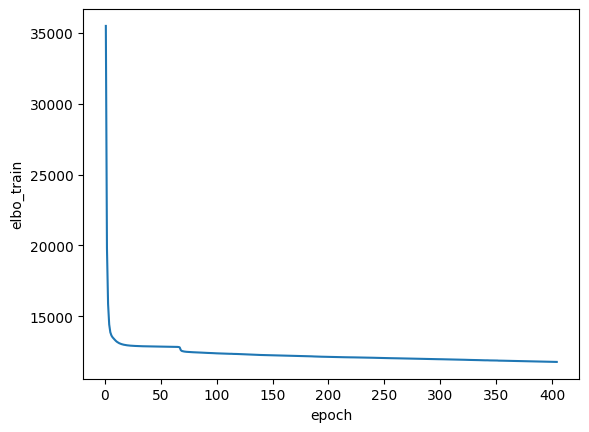

In [20]:
# Convergency plot
mvi.history['elbo_train']
x = np.linspace(1, (len(mvi.history['elbo_train'])), (len(mvi.history['elbo_train'])))
plt.plot(x, mvi.history['elbo_train'], label="train")
plt.xlabel('epoch')
plt.ylabel('elbo_train')
plt.show()